# 0.0 Imports

In [1]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import scikitplot as skplt
from matplotlib import pyplot as plt
from sklearn import preprocessing as pp
from sklearn import model_selection as  ms
from sklearn import ensemble  as en
from sklearn import neighbors as nh
from sklearn import linear_model as lm

## 0.1 Carregando dados

In [2]:
df_raw = pd.read_csv(r"C:\Users\Felipe\Documents\Repos\Projeto\train.csv", low_memory=False)



# 1.0 Descrição dos dados 

In [3]:
df1 = df_raw

## 1.1 Renomenado Colunas


In [4]:
cols_old = ['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']

snakecase = lambda x: inflection.underscore(x)

cols_new  = list(map(snakecase, cols_old))

df1.columns = cols_new                 

## 1.2 Dimensões de dados


In [5]:
print(f'Numero de linhas {df1.shape[0]}')
print(f'Numero de colunas {df1.shape[1]}')

Numero de linhas 381109
Numero de colunas 12


## 1.3 Tipos de dados


In [6]:
df1.dtypes


id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.4 Checando NA

In [7]:
df1.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.5 Tipos de alteração


In [8]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'])

In [9]:
# Tendência central = média, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão  = std, min, max, range, skew, kurtosis
d1 =  pd.DataFrame(num_attributes.apply(np.std)).T
d2 =  pd.DataFrame(num_attributes.apply(min)).T
d3 =  pd.DataFrame(num_attributes.apply(max)).T
d4 =  pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 =  pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T 
d6 =  pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T 

# Juntando 
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

m.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


## 2.0  Feature Engineering

In [10]:
df2 = df1.copy()


In [11]:
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_year' 
                                                                       if x == '1-2 Year'  else 'below_1_year')

df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x:  1 if x == 'Yes'  else 0)

## 3.0 EDA

In [12]:
df3 = df2.copy()

<Axes: xlabel='response', ylabel='age'>

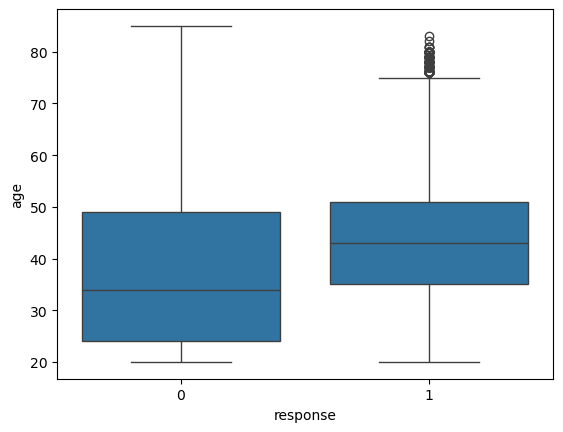

In [13]:
#AGE  0 não esão interessadas/ 1 estão interessadas
sns.boxplot(x='response', y='age', data=df3)

<Axes: xlabel='age', ylabel='Count'>

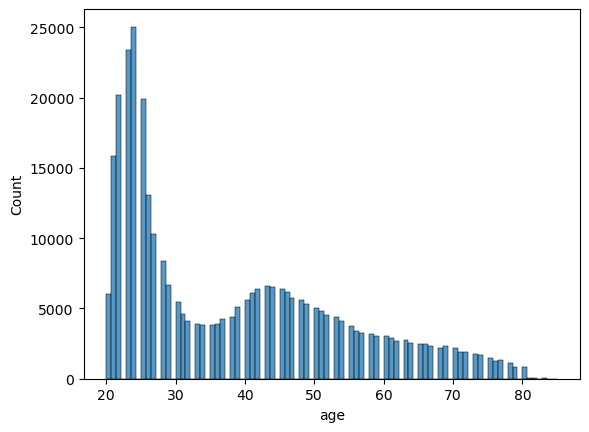

In [14]:
aux00 = df3.loc[df3['response'] == 0, 'age']
sns.histplot(aux00)

<Axes: xlabel='age', ylabel='Count'>

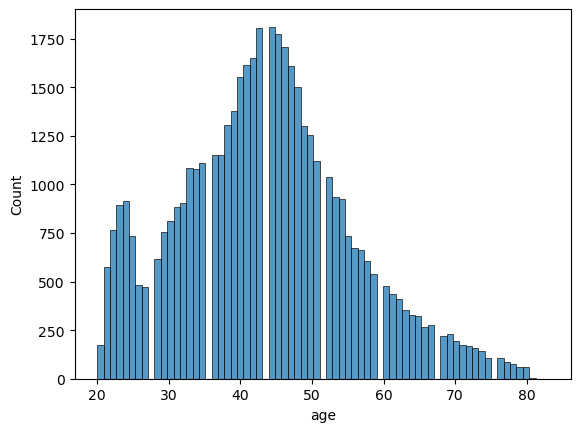

In [15]:
aux00 = df3.loc[df3['response'] == 1, 'age']
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='annual_premium'>

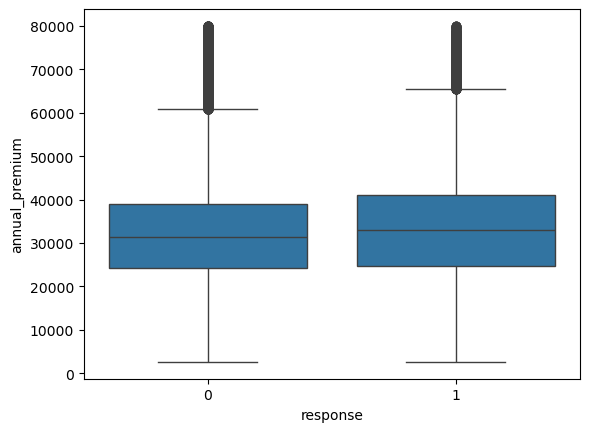

In [16]:
# annual_premium    
aux = df3[df3['annual_premium'] < 80000]
sns.boxplot( x='response', y= 'annual_premium', data=aux)

<Axes: xlabel='annual_premium', ylabel='Count'>

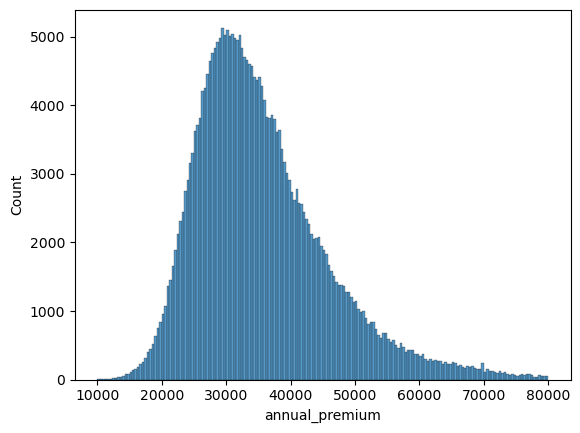

In [17]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 0, 'annual_premium']
sns.histplot(aux00)

<Axes: xlabel='annual_premium', ylabel='Count'>

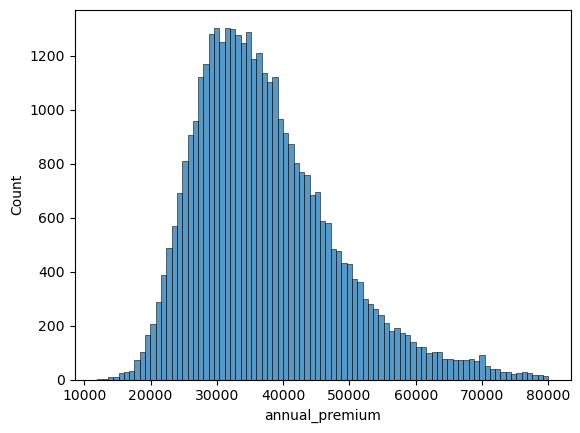

In [18]:
aux = df3[(df3['annual_premium'] > 10000) & (df3['annual_premium'] < 80000)]
aux00 = aux.loc[aux['response'] == 1, 'annual_premium']
sns.histplot(aux00)

<Axes: xlabel='response', ylabel='driving_license'>

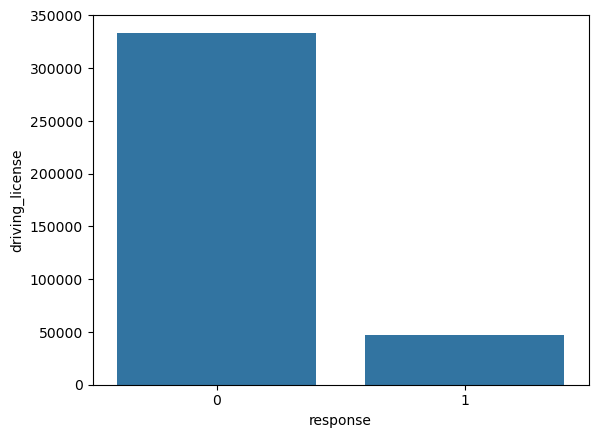

In [19]:
# driving_license 
aux = df3[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot( x='response', y='driving_license', data=aux) 
 

<Axes: xlabel='region_code', ylabel='id'>

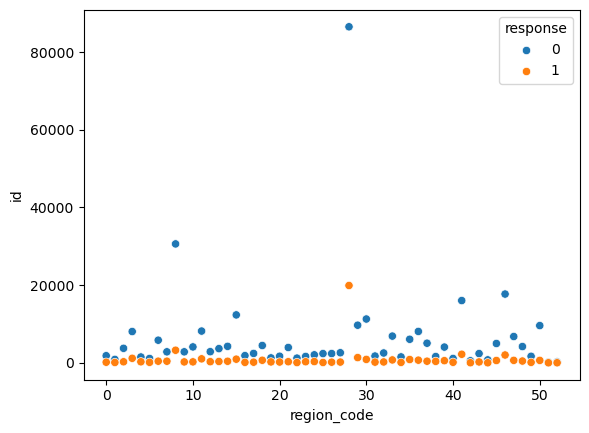

In [20]:
# region_code
aux0 = df3[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot( x = 'region_code', y = 'id', hue='response', data=aux0)

In [21]:
# previously_insured 
pd.crosstab( df3['previously_insured'], df3['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [22]:
# vehicle_age
df3[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_year,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_year,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


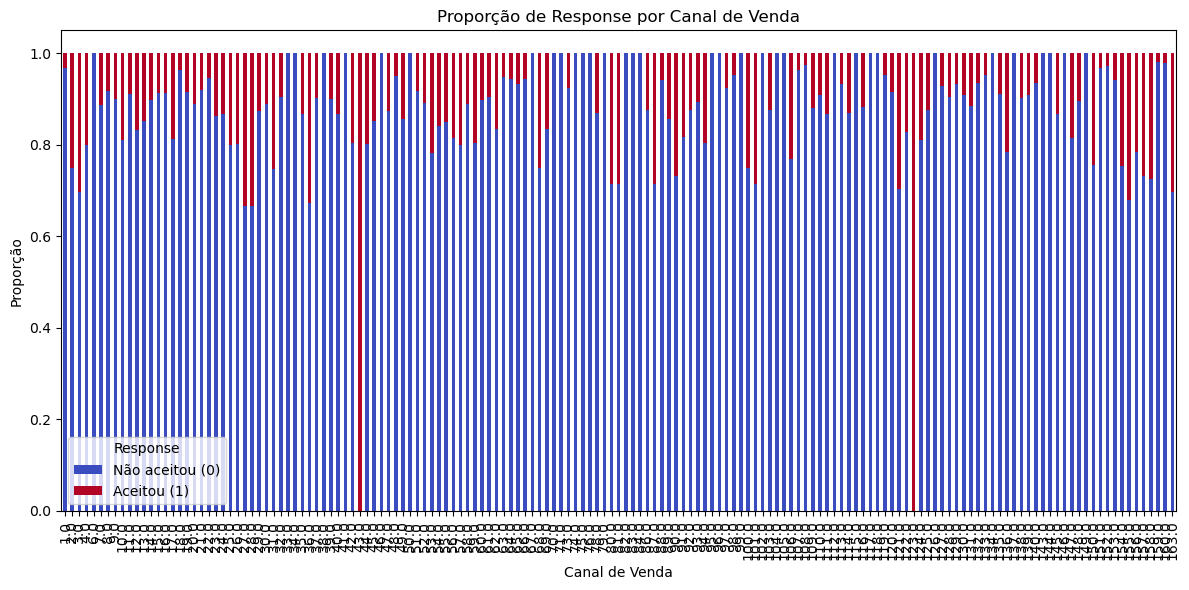

In [23]:
#policy_sales_channe

aux_prop = pd.crosstab(df3['policy_sales_channel'], df3['response'], normalize='index')

aux_prop.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Proporção de Response por Canal de Venda')
plt.xlabel('Canal de Venda')
plt.ylabel('Proporção')
plt.legend(title='Response', labels=['Não aceitou (0)', 'Aceitou (1)'])
plt.tight_layout()
plt.show()

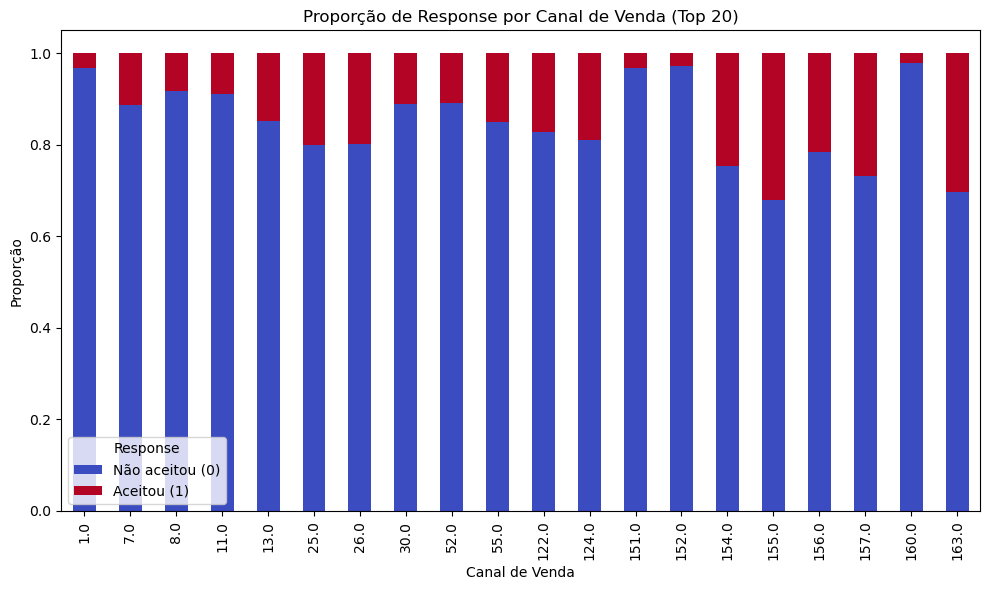

In [24]:
top_canais = df3['policy_sales_channel'].value_counts().head(20).index
aux_prop = pd.crosstab(
    df3[df3['policy_sales_channel'].isin(top_canais)]['policy_sales_channel'],
    df3['response'], normalize='index'
)

aux_prop.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Proporção de Response por Canal de Venda (Top 20)')
plt.xlabel('Canal de Venda')
plt.ylabel('Proporção')
plt.legend(title='Response', labels=['Não aceitou (0)', 'Aceitou (1)'])
plt.tight_layout()
plt.show()

<Axes: xlabel='response', ylabel='vintage'>

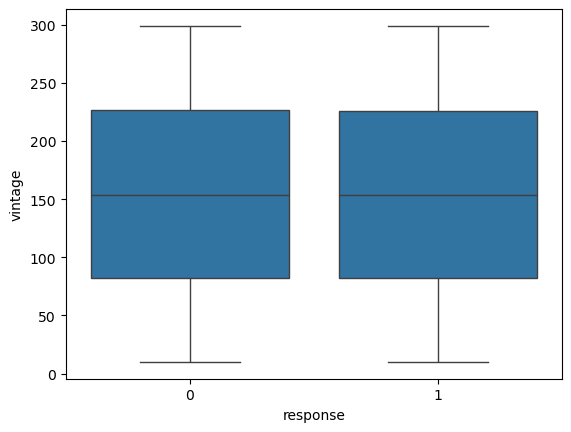

In [25]:
#vintage
sns.boxplot( x='response', y= 'vintage', data=df3)

<Axes: xlabel='vintage', ylabel='Count'>

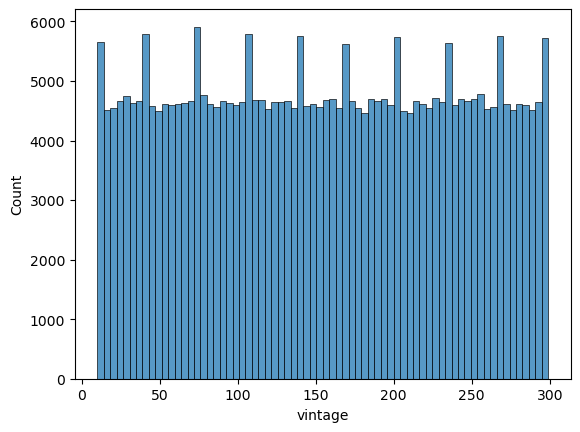

In [26]:
aux00 = df3.loc[df3['response'] == 0, 'vintage']
sns.histplot(aux00)

<Axes: xlabel='vintage', ylabel='Count'>

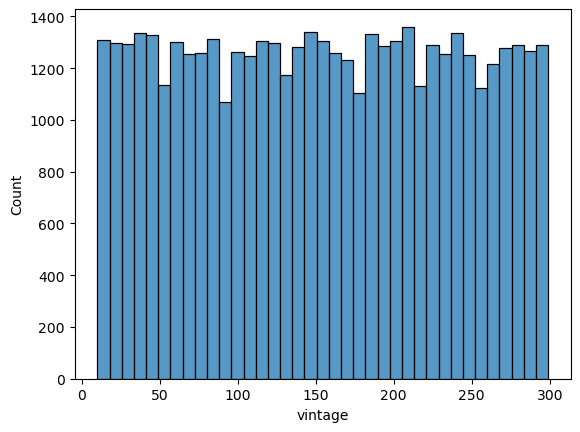

In [27]:
aux00 = df3.loc[df3['response'] == 1, 'vintage']
sns.histplot(aux00)

# 4,0 Data Preparation

In [28]:
df4 = df3.copy()

In [29]:
X = df3.drop('response', axis=1)
y = df3['response'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split(X, y, test_size=0.20)

df4 = pd.concat([x_train, y_train], axis=1)


## Standardization

In [30]:
 
ss= pp.StandardScaler()

#anuual_premium
df4['annual_premium'] = ss.fit_transform(df4[['annual_premium']].values)

## Rescaling

In [31]:
mms_age =  pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

#age
df4['age'] = mms_age.fit_transform(df4[['age']].values)

#vintage
df4['vintage'] = mms_vintage.fit_transform(df4[['vintage']].values) 

## Encoder 

In [32]:
# gender
target_encode_gender = df4.groupby('gender')['response'].mean()
df4['gender'] = df4['gender'].map(target_encode_gender)
 
# region_code
target_encode_region_code = df4.groupby('region_code')['response'].mean()
df4['region_code'] = df4['region_code'].map(target_encode_region_code)

# vehicle_age → one hot encoding
df4 = pd.get_dummies(df4, prefix='vehicle_age', columns=['vehicle_age'])

# policy_sales_channel → frequency encoding
fe_policy_sales_channel = df4.groupby('policy_sales_channel').size() / len(df4)
df4['policy_sales_channel'] = df4['policy_sales_channel'].map(fe_policy_sales_channel)


## Validation preparation 

In [33]:
# gender
x_validation['gender'] = x_validation['gender'].map(target_encode_gender)

# age
x_validation['age'] = mms_age.fit_transform(x_validation[['age']].values)

#region code
x_validation['region_code'] = x_validation['region_code'].map(target_encode_region_code)

# vehicle_age
if 'vehicle_age' in x_validation.columns:
    x_validation = pd.get_dummies(
        x_validation, 
        prefix='vehicle_age', 
        columns=['vehicle_age']
    )

# annual_premium
x_validation['annual_premium'] = ss.transform(x_validation[['annual_premium']].values)

# policy_sales_channel
x_validation['policy_sales_channel'] = x_validation['policy_sales_channel'].map(fe_policy_sales_channel)

# vintage
x_validation['vintage'] = mms_vintage.transform(x_validation[['vintage']].values)

# fillna
x_validation = x_validation.fillna(0)

# 6.0 Feature Selection

## 6.1 Features Importancia

In [34]:


# model definition

forest = en.ExtraTreesClassifier( n_estimators=250, random_state= 0, n_jobs=1)

# data preparation
x_train_n = df4.drop(['id', 'response'], axis=1)
y_train_n = y_train.values

forest.fit(x_train_n, y_train_n )

ExtraTreesClassifier(n_estimators=250, n_jobs=1, random_state=0)

Feature ranking:
                         feature  importance
8                        vintage    0.273074
6                 annual_premium    0.245129
1                            age    0.164656
3                    region_code    0.106692
5                 vehicle_damage    0.069275
7           policy_sales_channel    0.058741
4             previously_insured    0.054254
9       vehicle_age_below_1_year    0.013807
10  vehicle_age_between_1_2_year    0.006453
0                         gender    0.005040
11      vehicle_age_over_2_years    0.002392
2                driving_license    0.000489


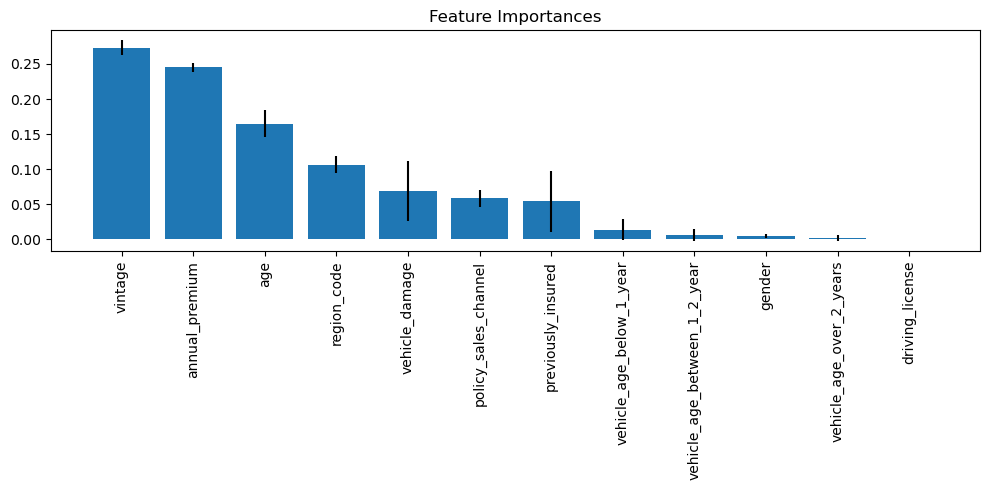

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Criar DataFrame de importâncias de forma correta
df = pd.DataFrame({
    'feature': x_train_n.columns,
    'importance': importances
})

print("Feature ranking:")
print(df.sort_values('importance', ascending=False))

# Plot das importâncias
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], yerr=std[indices], align='center')
plt.xticks(range(len(importances)), df['feature'].iloc[indices], rotation=90)
plt.tight_layout()
plt.show()
      

# 7.0 Machine Learning

In [37]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured', 'policy_sales_channel']
x_train = df4[cols_selected]
x_val = x_validation[cols_selected]
y_val = y_validation.copy()

## 7.1  knn

In [38]:
# knn
#model dfinition
knn_model = nh.KNeighborsClassifier(n_neighbors=2)

# model training
knn_model.fit(x_train, y_train)

# modelo predict  - poder generalização
yhat_knn  = knn_model.predict_proba(x_val)



<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

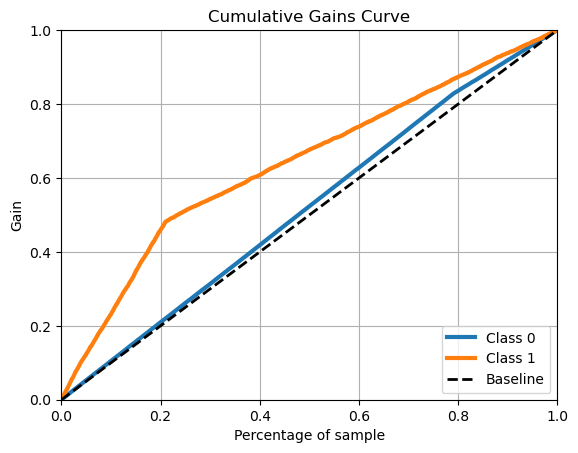

In [39]:
# Accumulative  Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_knn)

## 7.2 Regeressão Linear

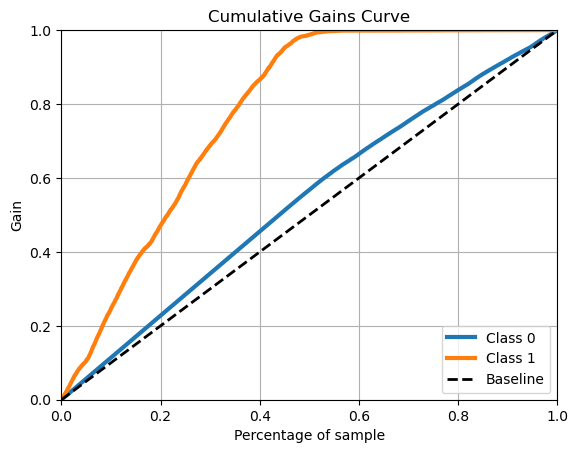

In [40]:
# model definition
lr_model = lm.LogisticRegression(random_state=42)

# model training 
lr_model.fit(x_train, y_train)

#model predicton
yhat_lr = lr_model.predict_proba(x_val)

# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_lr);

 

## 7.2 Extra Trees

In [41]:
# model definition
et = en.ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

# model fit
et.fit(x_train, y_train)

# model predict
yhat_et = et.predict_proba(x_val)

In [42]:
# model predict
yhat_et = et.predict_proba(x_val)

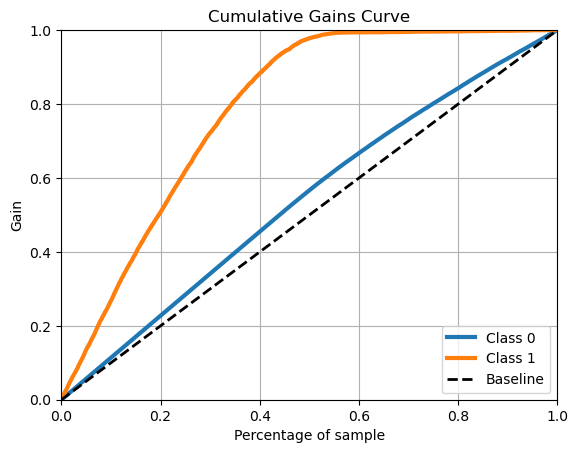

In [55]:
# Accumulative Gain
skplt.metrics.plot_cumulative_gain(y_val, yhat_et)
plt.show()

# 8.0 Model Perfomance

In [52]:
def precision_at_k(data, k=2000):
    data = data.reset_index(drop=True)
    
    data['ranking'] = data.index + 1
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']
    
    return data.loc[k-1, 'precision_at_k']

In [53]:
def precision_at_k(data, k=2000):
    data = data.reset_index(drop=True)

    data['ranking'] = data.index + 1
    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k-1, 'precision_at_k']

In [54]:
df8 = x_validation.copy()
df8['response'] = y_validation.copy()

# propensity score
df8['score'] = yhat_knn[:, 1]

# sorted clients by propensity score
df8 = df8.sort_values('score', ascending=False).reset_index(drop=True)

# precision at K
precision_at_50 = precision_at_k(df8, k=50)
print('Precision at K:', precision_at_50)

recall_at_50 = recall_at_k(df8, k=50)
print('Recall at K:', recall_at_50)

Precision at K: 0.34
Recall at K: 0.0018212984786800943


In [1]:
import os
os.getcwd()

'C:\\Users\\Felipe'